In [1]:
import sympy
sympy.init_printing()

In this notebook we reproduce the results from [Goldreich, Lithwick and Sari 2004](https://authors.library.caltech.edu/1019/1/GOLaraa04.pdf)

Hill radius

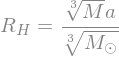

In [6]:
R_H = sympy.Symbol('R_H', positive=True) # Hill radius
a = sympy.Symbol('a', positive=True) # Semi major axis
M = sympy.Symbol('M', positive=True) # Planet mass
M_sol = sympy.Symbol('M_{\odot}', positive=True) # Solar mass
hill_radius = sympy.Eq(R_H, a*(M/M_sol)**sympy.Rational(1,3))
hill_radius

Equation 2

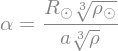

In [20]:
R = sympy.Symbol('R', positive=True) # Planet radius
rho = sympy.Symbol('rho', positive=True) # Planet density
rho_sol = sympy.Symbol(r'\rho_{\odot}', positive=True) # Solar density
R_sol = sympy.Symbol('R_{\odot}', positive=True) # Solar radius
alpha = sympy.Symbol('alpha', positive=True) # Tidal parameter
temp = R/R_H
temp = temp.subs(hill_radius.lhs, hill_radius.rhs)
temp = temp.subs(M, rho*R**3)
temp = temp.subs(M_sol, R_sol**3*rho_sol)
temp = sympy.Eq(alpha, temp)
eqn_2 = temp
eqn_2

Escape velocity from the planet

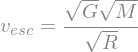

In [23]:
v_esc = sympy.Symbol(r'v_{esc}',positive=True) # Escape velocity
G = sympy.Symbol('G', positive=True)
escape_velocity = sympy.Eq(v_esc, sympy.sqrt(G*M/R))
escape_velocity

Equation 3

In [34]:
v_H = sympy.Symbol('v_H', positive=True) # Hill velocity
temp = sympy.sqrt(G*M/R_H)
temp = temp.subs(sympy.solve(escape_velocity,G,dict=True)[0])
temp = temp.subs(hill_radius.lhs, hill_radius.rhs)
temp = temp.subs(sympy.solve(eqn_2,a,dict=True)[0])
temp = temp.subs(M_sol,R_sol**3*rho_sol)
temp = temp.subs(M, R**3*rho)
eqn_3 = sympy.Eq(v_H,temp)
eqn_3

Equation 4

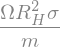

In [49]:
rho_d = sympy.Symbol('rho_d', positive=True) # Disc mass density
u = sympy.Symbol('u', positive=True) # Velocity dispersion
sigma = sympy.Symbol('sigma', positive=True) # Disc surface mass density
h_d = sympy.Symbol('h_d', positive=True) # Disc scale height
m = sympy.Symbol('m', positive=True) # Mass of a disc particle
Omega = sympy.Symbol('Omega', positive=True) # Keplerian frequency
temp = R_H**2*rho_d*u/m
temp = temp.subs(rho_d, sigma/h_d)
temp = temp.subs(h_d, u/Omega)
eqn_4_rhs = temp
eqn_4_rhs

Equation 5

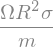

In [53]:
temp = R**2*rho_d*u/m
temp = temp.subs(rho_d, sigma/h_d)
temp = temp.subs(h_d, u/Omega)
eqn_5_rhs = temp
eqn_5_rhs

Equation 6. Using the conservation of angular momentum

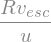

In [58]:
b = sympy.Symbol('b', positive=True) # Impact parameter
temp = sympy.Eq(sympy.sqrt(G*M*R), b*u)
temp = sympy.solve(temp, b)[0]
temp = temp.subs(sympy.solve(escape_velocity,G,dict=True)[0])
eqn_6_rhs = temp
eqn_6_rhs

Equation 7

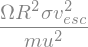

In [63]:
temp = b**2*u*rho_d/m
temp = temp.subs(rho_d, sigma/h_d)
temp = temp.subs(h_d, u/Omega)
temp = temp.subs(b, eqn_6_rhs)
eqn_7_rhs = temp
eqn_7_rhs

Equation 9

In [102]:
temp = h_d>b
temp = temp.subs(h_d, u/Omega)
temp = temp.subs(b, sympy.sqrt(G*M*R)/v_H)
temp = temp.subs(Omega, sympy.sqrt(G*M_sol/a**3))
temp = temp.subs(M_sol, rho_sol*R_sol**3)
temp = temp.subs(sympy.solve(eqn_2,R_sol,dict=True)[0])
temp = temp.subs(rho,M/R**3)
temp = temp.subs(sympy.solve(escape_velocity,G,dict=True)[0])
temp = temp.subs(sympy.solve(eqn_3,v_esc,dict=True)[0])
eqn_9 = sympy.solve(temp,u)
eqn_9

Equation 10

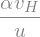

In [118]:
temp = b**2/(R_H*h_d)
temp = temp.subs(h_d, u/Omega)
temp = temp.subs(b, sympy.sqrt(G*M*R)/v_H)
temp = temp.subs(sympy.solve(eqn_3,v_H,dict=True)[0])
temp = temp.subs(sympy.solve(escape_velocity,G,dict=True)[0])
temp = temp.subs(Omega,v_H/R_H)
temp = temp.subs(R_H,R/alpha)
eqn_10_rhs = temp
eqn_10_rhs

Equation 11

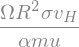

In [129]:
temp = eqn_10_rhs*eqn_4_rhs
temp = temp.subs(R_H, R/alpha)
eqn_11_rhs = temp
eqn_11_rhs

Equation 12

In [130]:
eqn_12_rhs = R_H*sympy.sqrt(alpha)/R_H
eqn_12_rhs

Equation 13

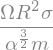

In [137]:
temp = eqn_12_rhs*eqn_4_rhs
temp = temp.subs(R_H, R/alpha)
eqn_13 = temp
eqn_13

Equation 14

In [161]:
n_s = sympy.Symbol('n_s', positive=True) # Number density of small bodies
v = sympy.Symbol('v', positive=True) # Velocity of the big body
eqn_14_rhs = -n_s*R**2*(u+v)**2*m
eqn_14_rhs

Equation 15

In [160]:
eqn_15_rhs = n_s*R**2*(u-v)**2*m
eqn_15_rhs

Equation 16

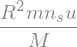

In [162]:
eqn_16_rhs = eqn_15_rhs + eqn_14_rhs
eqn_16_rhs = -eqn_16_rhs.simplify()/M/4/v
eqn_16_rhs

Equation 17

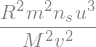

In [163]:
t = sympy.Symbol('t', positive=True) # Time, dummy variable here
temp = m*u # Momentum from a single collision
temp = temp*sympy.sqrt(t*n_s*R**2*u) # Because of random walk, the momentum grows as the square root of the number of collisions
temp = temp/M # From momentum to velocity
temp = temp**2/v**2/t
eqn_17_rhs = temp
eqn_17_rhs

By equating the cooling and heating rates we can find the equilibrium velocity 

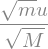

In [164]:
temp = sympy.Eq(eqn_17_rhs, eqn_16_rhs)
sympy.solve(temp,v)[0]

Equation 19

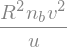

In [179]:
n_b = sympy.Symbol('n_b', positive=True) # Number density of large bodies
temp = n_b*R**2*(u+v)*((u+2*v)**2-u**2) + n_b*R**2*(u-v)*((u-2*v)**2-u**2)
temp = temp/u**2/16
temp = temp.simplify()
eqn_19_rhs = temp
eqn_19_rhs

Equation 20

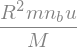

In [181]:
temp = n_b*R**2*u*(u**2*m**2/M)/(u**2*m)
eqn_20_rhs = temp
eqn_20_rhs

Equtation 22

In [182]:
eqn_22_rhs = n_b*u*R**2
eqn_22_rhs

Equation 23

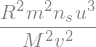

In [211]:
eqn_23_rhs = n_s*u*R**2*(m*u/M/v)**2
eqn_23_rhs

Equation 24

In [212]:
temp = eqn_16_rhs
temp = temp.subs(n_s, rho_d/m)
temp = temp.subs(rho_d, sigma/h_d)
temp = temp.subs(h_d, u/Omega)
temp = temp.subs(M, rho*R**3)
eqn_24_rhs = temp
eqn_24_rhs

Equation 25

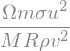

In [201]:
temp = eqn_17_rhs
temp = temp.subs(n_s, rho_d/m)
temp = temp.subs(rho_d, sigma/h_d)
temp = temp.subs(h_d, u/Omega)
temp = temp.subs(M**2, M*rho*R**3)
eqn_25_rhs = temp
eqn_25_rhs

Equation 26

In [209]:
Sigma = sympy.Symbol('Sigma', positive=True) # Surface density of large bodies
temp = eqn_22_rhs
temp = temp.subs(n_b, Sigma/M/h_d)
temp = temp.subs(h_d, u/Omega)
temp = temp.subs(M, rho*R**3)
eqn_26_rhs = temp
eqn_26_rhs

Equation 27

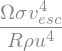

In [215]:
eqn_27_rhs = eqn_24_rhs*(v_esc/u)**4
eqn_27_rhs

Equation 28

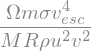

In [217]:
eqn_28_rhs = eqn_25_rhs*(v_esc/u)**4
eqn_28_rhs

Equation 29

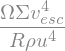

In [218]:
eqn_29_rhs = eqn_26_rhs*(v_esc/u)**4
eqn_29_rhs

Equation 30

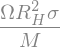

In [228]:
temp = rho_d*R_H**2*u/M
temp = temp.subs(rho_d, sigma/h_d)
temp = temp.subs(h_d, u/Omega)
eqn_30_rhs = temp
eqn_30_rhs

Verify second equality

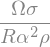

In [236]:
temp = eqn_30_rhs
temp = temp.subs(hill_radius.lhs, hill_radius.rhs)
temp = temp.subs(sympy.solve(eqn_2,a,dict=True)[0])
temp = temp.subs(M_sol, rho_sol*R_sol**3)
temp = temp.subs(M, rho*R**3)
eqn_30_rhs_2 = temp
eqn_30_rhs_2

Equation 31

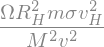

In [237]:
eqn_31_rhs = (sigma*Omega*R_H**2/m)*(m*v_H/M/v)**2
eqn_31_rhs

Second form of equation 31

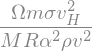

In [244]:
temp = eqn_31_rhs
temp = temp.subs(hill_radius.lhs, hill_radius.rhs)
temp = temp.subs(sympy.solve(eqn_2,a,dict=True)[0])
temp = temp.subs(M_sol, rho_sol*R_sol**3)
temp = temp.subs(M, rho*R**3)
temp = temp.subs(rho**2, M*rho/R**3)
eqn_31_rhs_2 = temp
eqn_31_rhs_2

Equation 32

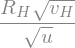

In [245]:
eqn_32_rhs = sympy.sqrt(v_H/u)*R_H
eqn_32_rhs

Equation 33

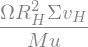

In [247]:
eqn_33_rhs = (Sigma/M)*Omega*eqn_32_rhs**2
eqn_33_rhs

Second form for equation 33

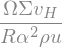

In [249]:
temp = eqn_33_rhs
temp = temp.subs(hill_radius.lhs, hill_radius.rhs)
temp = temp.subs(sympy.solve(eqn_2,a,dict=True)[0])
temp = temp.subs(M_sol, rho_sol*R_sol**3)
temp = temp.subs(M, rho*R**3)
temp